In [1]:
%pylab inline

def sense(x):
    return x

def simulate(Δt, x, u):
    x += Δt * u
    return x

def control(t, y):
    ux = -4*sin(t)
    uy = 2*cos(t)
    return array([ux, uy])

Populating the interactive namespace from numpy and matplotlib


In [5]:
tf = 2*pi
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
center = np.array([3., 2.])
dist = np.array([4*cos(pi/6), 4*sin(pi/6)])
x = center + dist
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y) 
    A = [[cos(pi/6), -sin(pi/6)],[sin(pi/6), cos(pi/6)]]
    u = np.dot(A, u)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

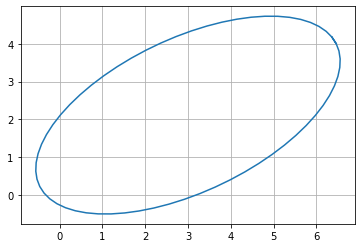

In [6]:
grid()
plot(x_log[:,0], x_log[:,1])

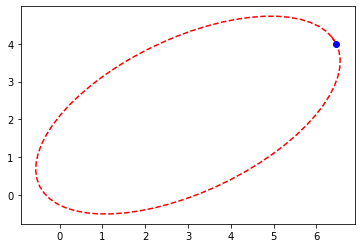

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())